# 데이터 파일 읽기

- [서울시 코로나19 확진자 현황](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)
## 컬럼
- ID : 확진자 ID. 발생순서대로 1씩증가하는 값
- 확진일: 확진 날짜
- 자치구: 확진 결과를 받은 지역구.
- 여행력: 해외유입의 경우 국가명
- 접촉력: 감염된 경로. 
- 현재상태: 퇴원, 사망, NA: 치료중

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('data/corona19_seoul_2021-03-15.csv', encoding='utf-8')
df.shape

(30061, 6)

In [167]:
covid = pd.read_csv('data/corona19_seoul_2021-03-15.csv', index_col='ID')

In [168]:
covid.sort_values('ID', inplace=True)

# DataFrame 기본정보 조회

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30061 non-null  int64 
 1   확진일     30061 non-null  object
 2   자치구     30061 non-null  object
 3   여행력     976 non-null    object
 4   접촉력     30061 non-null  object
 5   현재상태    27143 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [170]:
df.isna(), df.isna().sum()

(          ID    확진일    자치구    여행력    접촉력   현재상태
 0      False  False  False   True  False  False
 1      False  False  False   True  False   True
 2      False  False  False   True  False   True
 3      False  False  False   True  False   True
 4      False  False  False   True  False   True
 ...      ...    ...    ...    ...    ...    ...
 30056  False  False  False   True  False  False
 30057  False  False  False  False  False  False
 30058  False  False  False   True  False  False
 30059  False  False  False  False  False  False
 30060  False  False  False  False  False  False
 
 [30061 rows x 6 columns],
 ID          0
 확진일         0
 자치구         0
 여행력     29085
 접촉력         0
 현재상태     2918
 dtype: int64)

In [171]:
df.head()

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN


In [172]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진일     30061 non-null  object
 1   자치구     30061 non-null  object
 2   여행력     976 non-null    object
 3   접촉력     30061 non-null  object
 4   현재상태    27143 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [173]:
covid.describe()

,확진일,자치구,여행력,접촉력,현재상태
count,30061,30061,976,30061,27143
unique,384,27,120,512,2
top,2020-12-17,기타,미국,기타 확진자 접촉,퇴원
freq,588,2000,329,9660,26738


In [174]:
covid.head()

,확진일,자치구,여행력,접촉력,현재상태
ID,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원
2,2020-01-30,강서구,중국,해외유입,퇴원
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
4,2020-01-30,종로구,중국,해외유입,퇴원
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원


##  범주형 컬럼들의 고유값들 조회

In [175]:
covid['자치구'].unique()

array(['강서구', '중랑구', '종로구', '마포구', '성북구', '타시도', '송파구', '서대문구', '성동구',
       '서초구', '구로구', '강동구', '은평구', '관악구', '금천구', '노원구', '동작구', '강남구',
       '양천구', '동대문구', '광진구', '영등포구', '도봉구', '용산구', '강북구', '중구', '기타'],
      dtype=object)

In [176]:
covid['여행력'].unique()

array(['중국', nan, '싱가폴', '베트남', '태국', '이탈리아', '프랑스', '필리핀', '독일, 프랑스',
       '폴란드', '스페인', '영국', '오스트리아, 모로코, 프랑스', '미국',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '이탈리아, 프랑스', '프랑스, 독일', '스페인, 카타르',
       '캐나다', '독일', '브라질,아르헨티아,칠레,볼리비아', '말레이시아, 인도네시아',
       '아르헨티나, 볼리비아, 브라질', '유럽', '아시아', '멕시코, 미국', '브라질', '미국, 브라질',
       '오스트리아', '아일랜드', '미국, 캐나다, 멕시코', '오세아니아', '일본', '포르투갈', '인도네시아',
       '호주, 인도네시아', '터키', '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '멕시코', '아프리카',
       '러시아', '파키스탄', 'UAE', '방글라데시', '이라크', '카자흐스탄', '아랍에미리트', '인도',
       '키르기스스탄', '우즈베키스탄', '페루', '미국, 멕시코', '나이지리아', '쿠웨이트', '모로코, 터키',
       '홍콩', '사우디아라비아', '에콰도르', '케냐', '에티오피아', '이집트', '21263', '파라과이',
       '키르기즈스탄', '우크라이나', '네팔', '카타르', '체코', '몰타', '우간다', '요르단', '이란',
       '네덜란드', '에디오피아', '튀니지', '가나', '핀란드', '헝가리', '루마니아', '수단', '미얀마',
       '28238', '크로아티아', '스웨덴', '벨기에', '모로코', '가봉', '아르헨티나', '호주', '알제리',
       '알바니아', '남아공', '두바이', '리투아니아', '시리아', '탄자니아', '콩고', '코트디부아르',
       '르완다', '싱가포르', '캄보디아', '스리랑카', '

In [177]:
covid['접촉력'].unique()

array(['해외유입', '종로구 집단발병', '기타 확진자 접촉', '성동구 아파트 관리사무소', '타시도 확진자 접촉',
       '은평성모병원', '명성교회', '감염경로 조사중', '동대문관련(교회pc방)', 'EZHLD',
       '동대문관련(요양보호사)', 'Ace 손해보험', '성남 은혜의강 교회', '세브란스', '플링크(IT기업)',
       '신 천 지', '삼성물산', '만민중앙교회', '서울아산병원', '이에스에스콤글로벌', 'ㅋㅋ트랜드', '의정부성모',
       'Liquid Soul', '타시도 확진자 접촉 (의정부성모)', '위에화엔터테인먼트', '이태원 클럽 관련',
       '삼성서울병원', '원어성경연구회', '영랜브란트미술학원', '은평구가족 관련', 'coupang',
       '강남구 동인교회 관련 (구리시 일가족)', 'KB생명', '관악구 투석환자 관련',
       '예수제자교회 한국대학생 선교회(CCC) 관련', '(인천계양구일가족관련) 연세나로학원', '연아나 뉴스클래스',
       '부천 대웅제약', '수도권 개척교회모임', '서초구 가족관련', '안양 목회자 관련', '리치웨이', '삼성화재',
       '양천구운동시설', '용인형제', '리치웨이 (명성하우징)', '리치웨이 (SJ투자회사)',
       '리치웨이 (이민자 쉼터)', '리치웨이 (예수비젼성결교회)', '도봉구 요양시설 관련', '국방안보지원사령부',
       '대전 꿈꾸는 교회', '대전 다단계 관련', '금천구 도정기회사 관련', '대자연 코리아', '강남구 역삼동 모임',
       '예스병원', '강남구 오렌지라이프 관련', '서울시청역 시설개선공사 안전요원관련', '의왕 롯데 물류센터 관련',
       '관악구 왕성교회', '강남구 소재 사무실', '현대카드 관악구 왕성교회', '관악구 중국동포 일가족',
       '강남역삼동금융회사', '중랑구 일가족', '타시도 확진자 접촉 (의정부

In [178]:
covid['현재상태'].unique()

array(['퇴원', '사망', nan], dtype=object)

# 확진일 확진자수 정보 조회

## 확진일의 빈도수

In [179]:
covid.groupby('확진일')['확진일'].count()

확진일
2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-03-10    137
2021-03-11    140
2021-03-12    140
2021-03-13    112
2021-03-14    112
Name: 확진일, Length: 384, dtype: int64

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

## 확진일을 datetime으로 변환

In [180]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [182]:
covid['확진일'] = pd.to_datetime(covid['확진일'], format='%Y-%m-%d')

In [183]:
covid.head()

,확진일,자치구,여행력,접촉력,현재상태
ID,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원
2,2020-01-30,강서구,중국,해외유입,퇴원
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
4,2020-01-30,종로구,중국,해외유입,퇴원
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원


In [184]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     30061 non-null  datetime64[ns]
 1   자치구     30061 non-null  object        
 2   여행력     976 non-null    object        
 3   접촉력     30061 non-null  object        
 4   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.4+ MB


## 확진일 관련 파생변수 추가
- 확진일에서 년을 추출해서 **'년'** 컬럼을 생성
- 확진일에서 월을 추출해서 **'월'** 컬럼을 생성
- 확진일에서 주(1년 중 몇번째 주)를 추출해서 **'주'** 컬럼을 생성
- 확진일에서 요일을 추출해서 **'요일'** 컬럼을 생성. 

In [185]:
df['확진일'].dt.isocalendar()#.groupby(['year','week'])['year'].count()

,year,week,day
0,2021,10,7
1,2021,10,7
2,2021,10,7
3,2021,10,7
4,2021,10,7
...,...,...,...
30056,2020,5,5
30057,2020,5,4
30058,2020,5,4
30059,2020,5,4


In [186]:
df['년'] = df['확진일'].dt.isocalendar().year
df['월'] = df['확진일'].dt.month
df['주'] = df['확진일'].dt.isocalendar().week
df['요일'] = df['확진일'].dt.isocalendar().day

In [187]:
df.head(2)

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,7
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,7


In [188]:
covid['년'] = covid['확진일'].dt.isocalendar().year
covid['월'] = covid['확진일'].dt.month
covid['주'] = covid['확진일'].dt.isocalendar().week
covid['요일'] = covid['확진일'].dt.isocalendar().day

## 요일 정수를 문자열(월,화,수,목,금,토,일)로 변경
- datetime에서 요일을 추출하면 정수로 반환된다.
    - dt.week 로 조회시 - 월요일: 0, 일요일: 6
    - dt.isocalendar()['week']로 조회시 - 월요일 : 1, 일요일: 7

In [242]:
def changedays(x):
    if x == 1:
        return '월'
    elif x == 2:
        return '화'
    elif x == 3:
        return '수'
    elif x == 4:
        return '목'
    elif x == 5:
        return '금'
    elif x == 6:
        return '토'
    elif x == 7:
        return '일'
df['요일'] = df['요일'].apply(changedays)
#covid['요일'] = covid['요일'].apply(changedays)

In [190]:
df.head()

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,7
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,7
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,7
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,7
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,7


In [191]:
covid.head()


,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,4,금
2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금


In [192]:

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     30061 non-null  datetime64[ns]
 1   자치구     30061 non-null  object        
 2   여행력     976 non-null    object        
 3   접촉력     30061 non-null  object        
 4   현재상태    27143 non-null  object        
 5   년       30061 non-null  UInt32        
 6   월       30061 non-null  int64         
 7   주       30061 non-null  UInt32        
 8   요일      30061 non-null  object        
dtypes: UInt32(2), datetime64[ns](1), int64(1), object(5)
memory usage: 2.1+ MB


###  Categorical Data 타입
> - 범주형 타입
> - 문자열과 차이점
>     - 내부적으로 정수로 관리되기 때문에 메모리를 절약 할 수 있다. 
>     - 사전적 순서와 논리적 순서가 다를 경우 논리적 순서로 정렬되도록 정의 할 수 있다.
>         - 사전적순서: Four One Three Two
>         - 논리적순서: One Two Three Four
> - str 타입 Series를 Categorical 타입으로 변환
>     - `pandas.categorical(변환할Series, [categories=[고유값 리스트], ordered=None])`
    - categories: 고유값 리스트를 지정한다. 생략할 경우 Series의 고유값들을 가지고 만든다.
        - 원하는 순서대로 지정하기 위해서는 설정한다.
    - ordered: 순서형 여부 설정

## 요일을 Categorical Type으로 변환

In [249]:
df['요일'] = pd.Categorical(df['요일'], categories=list("월화수목금토일"))

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
 6   년       30061 non-null  UInt32        
 7   월       30061 non-null  int64         
 8   주       30061 non-null  UInt32        
 9   요일      30061 non-null  UInt32        
dtypes: UInt32(3), datetime64[ns](1), int64(2), object(4)
memory usage: 2.0+ MB


In [195]:
covid['요일'] = pd.Categorical(covid['요일'], categories=['월','화','수','목','금','토','일'])


In [196]:
covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30061 entries, 1 to 30061
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진일     30061 non-null  datetime64[ns]
 1   자치구     30061 non-null  object        
 2   여행력     976 non-null    object        
 3   접촉력     30061 non-null  object        
 4   현재상태    27143 non-null  object        
 5   년       30061 non-null  UInt32        
 6   월       30061 non-null  int64         
 7   주       30061 non-null  UInt32        
 8   요일      30061 non-null  category      
dtypes: UInt32(2), category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 1.9+ MB


In [197]:
covid.head()


,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,4,금
2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금


## 확진자 수 변화 추이 시각화

In [198]:
day_co = df['확진일'].value_counts()
day_co

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2020-05-01      1
2020-04-19      1
2020-01-24      1
2020-03-05      1
2020-04-24      1
Name: 확진일, Length: 384, dtype: int64

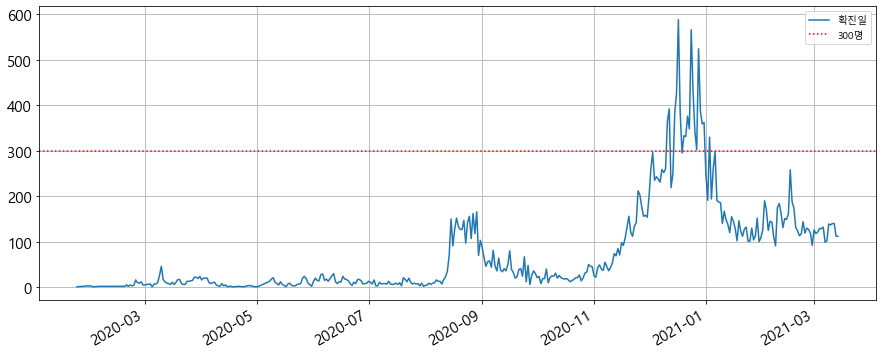

In [199]:
day_co.plot(kind='line', figsize=(15,6))

plt.axhline(300, color='red', linestyle=':',label='300명')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
covid.groupby('확진일')['확진일'].count()

확진일
2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-03-10    137
2021-03-11    140
2021-03-12    140
2021-03-13    112
2021-03-14    112
Name: 확진일, Length: 384, dtype: int64

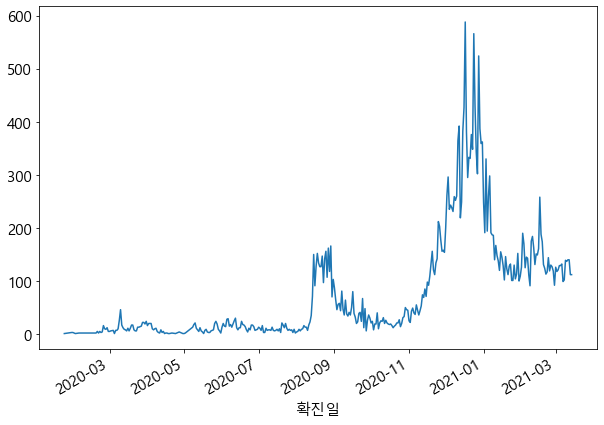

In [201]:
plt.figure(figsize=(10,7))
covid.groupby('확진일')['확진일'].count().plot(kind='line')

plt.show()

## 2020년 12월 이후 확진일 기준으로 확진자 수 변화 추이 시각화

In [202]:
dec_2020_co = df.loc[df['확진일']>='2020-12-01','확진일'].value_counts()
dec_2020_co

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2021-01-24    101
2021-01-30    100
2021-03-07     99
2021-02-28     92
2021-02-08     91
Name: 확진일, Length: 104, dtype: int64

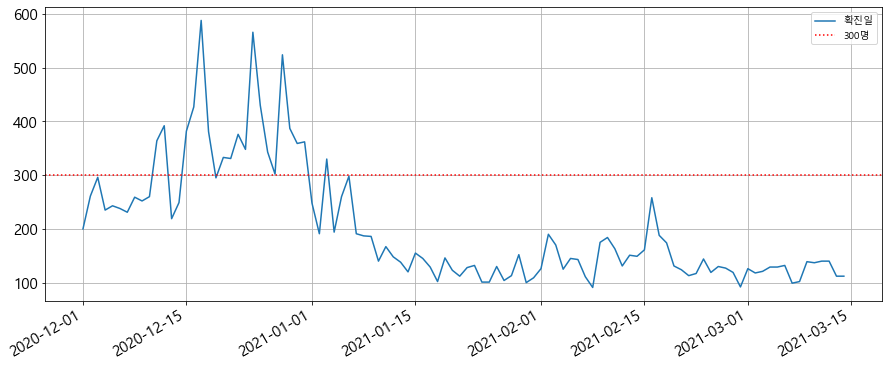

In [203]:
dec_2020_co.plot(kind='line',figsize=(15,6))
plt.axhline(300, color='red', linestyle=':', label='300명')
plt.legend()
plt.grid(True)
plt.show()

In [204]:
covid[covid['확진일']>='20201201']

,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
8201,2020-12-01,중랑구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8328,2020-12-01,서대문구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8604,2020-12-01,중랑구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8609,2020-12-01,동작구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
8630,2020-12-01,강서구,NaN,영등포구 회사 관련,퇴원,2020,12,49,화
...,...,...,...,...,...,...,...,...,...
30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일


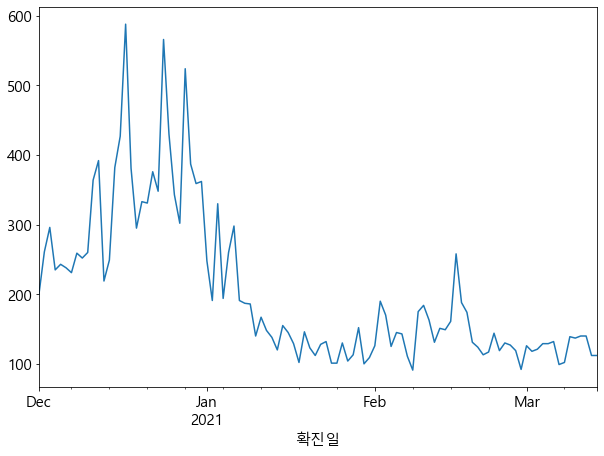

In [205]:
plt.figure(figsize=(10,7))
covid[covid['확진일']>='20201201'].groupby('확진일')['확진일'].count().plot(kind='line')
plt.show()

## 년도-주 단위 확진자 수 변화 추이 시각화
- ex) 2020년 1주차, 2020년 2주차 ... 

In [206]:
year_week_co = df.groupby(['년','주'])['ID'].count()
year_week_co

년     주 
2020  4        1
      5        7
      6        4
      7        2
      8       17
      9       61
      10      38
      11     124
      12      76
      13     105
      14     129
      15      47
      16      15
      17       3
      18       8
      19      52
      20      47
      21      39
      22      88
      23     134
      24     125
      25     105
      26      78
      27      67
      28      57
      29      48
      30      97
      31      38
      32      76
      33     394
      34     912
      35     921
      36     459
      37     341
      38     280
      39     237
      40     164
      41     170
      42     139
      43     127
      44     250
      45     291
      46     432
      47     820
      48    1182
      49    1627
      50    1977
      51    2655
      52    2696
      53    2401
2021  1     1456
      2     1002
      3      844
      4      809
      5     1010
      6     1044
      7     1149
      8      848
     

In [207]:
range(year_week_co.size)

range(0, 60)

In [208]:
[f'{year}년 {week}주차' for i, (year, week) in enumerate(year_week_co.index) if i%10==0]

['2020년 4주차',
 '2020년 14주차',
 '2020년 24주차',
 '2020년 34주차',
 '2020년 44주차',
 '2021년 1주차']

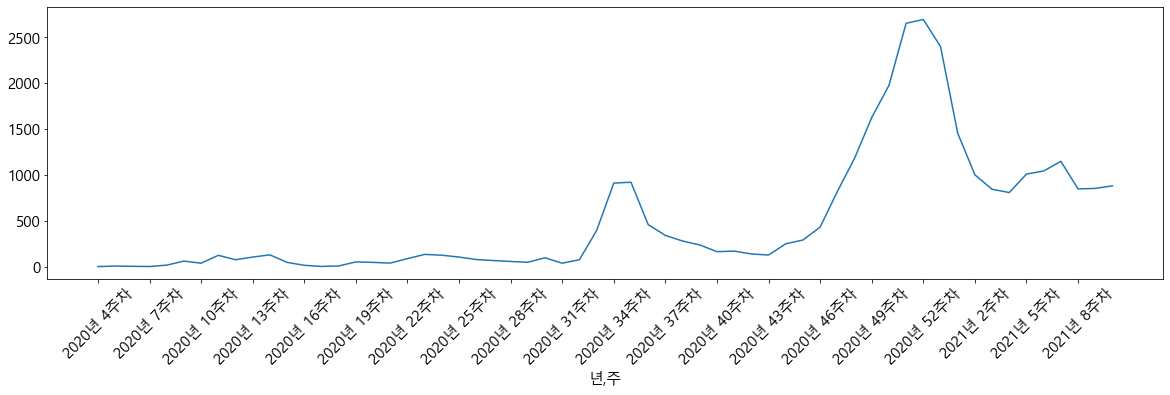

In [209]:
year_week_co.plot(figsize=(20,5))
plt.xticks(ticks=range(0,year_week_co.size,3),
          labels=[f'{year}년 {week}주차' for i, (year, week) in enumerate(year_week_co.index) if i%3==0],
          rotation=45)
plt.show()

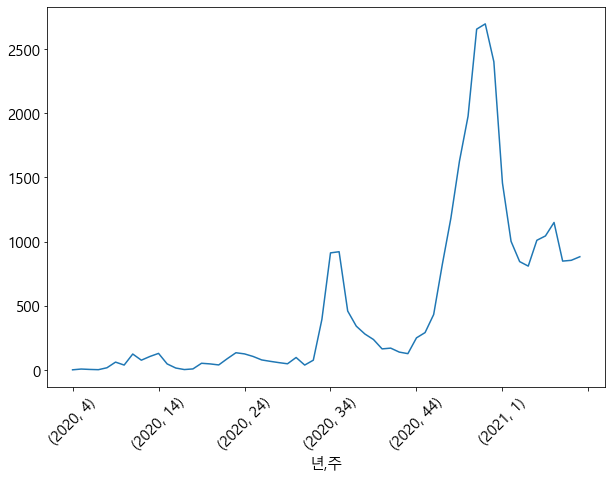

In [210]:
plt.figure(figsize=(10,7))
covid.groupby(['년','주'])['확진일'].count().plot(kind='line')
plt.xticks(rotation=45)
plt.show()

In [211]:
covid.groupby(['년','주']).count()

확진일   자치구  여행력   접촉력  현재상태     월    요일
년    주                                          
2020 4      1     1    1     1     1     1     1
     5      7     7    3     7     7     7     7
     6      4     4    3     4     4     4     4
     7      2     2    0     2     2     2     2
     8     17    17    1    17    17    17    17
     9     61    61    4    61    61    61    61
     10    38    38    2    38    38    38    38
     11   124   124    8   124   124   124   124
     12    76    76   30    76    76    76    76
     13   105   105   68   105   105   105   105
     14   129   129   81   129   129   129   129
     15    47    47   32    47    47    47    47
     16    15    15   11    15    15    15    15
     17     3     3    3     3     3     3     3
     18     8     8    8     8     8     8     8
     19    52    52    2    52    52    52    52
     20    47    47    3    47    47    47    47
     21    39    39    8    39    39    39    39
     22    88    88    9    88    88    88    88
     23   134   134    3   134   134   134   134
     24   125   125    5   125   125   125   125
     25   105   105    7   105   105   105   105
     26    78    78    7    78    78    78    78
     27    67    67    5    67    67    67    67
     28    57    57   15    57    57    57    57
     29    48    48    4    48    48    48    48
     30    97    97   11    97    97    97    97
     31    38    38    8    38    38    38    38
     32    76    76   16    76    76    76    76
     33   394   394   13   394   394   394   394
     34   912   912    7   912   912   912   912
     35   921   921   11   921   921   921   921
     36   459   459    6   459   459   459   459
     37   341   341    6   341   341   341   341
     38   280   280    8   280   278   280   280
     39   237   237    4   237   237   237   237
     40   164   164    3   164   164   164   164
     41   170   170   20   170   169   170   170
     42   139   139   12   139   139   139   139
     43   127   127    5   127   127   127   127
     44   250   250    8   250   247   250   250
     45   291   291   20   291   288   291   291
     46   432   432   23   432   424   432   432
     47   820   820   18   820   813   820   820
     48  1182  1182   18  1182  1163  1182  1182
     49  1627  1627   27  1627  1584  1627  1627
     50  1977  1977   19  1977  1920  1977  1977
     51  2655  2655   24  2655  2452  2655  2655
     52  2696  2696   33  2696  2414  2696  2696
     53  2401  2401   21  2401  2180  2401  2401
2021 1   1456  1456   36  1456  1440  1456  1456
     2   1002  1002   31  1002   988  1002  1002
     3    844   844   43   844   830   844   844
     4    809   809   26   809   767   809   809
     5   1010  1010   26  1010   950  1010  1010
     6   1044  1044   33  1044   981  1044  1044
     7   1149  1149   44  1149  1027  1149  1149
     8    848   848   37   848   570   848   848
     9    854   854   21   854   264   854   854
     10   882   882   15   882    12   882   882

## 년-월 단위  확진자수 조회 및 시각화

In [212]:
year_month_co = df.groupby(['년','월'])['ID'].count()
year_month_co

년     월 
2020  1       776
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10433
2021  1      4111
      2      4051
      3      1736
Name: ID, dtype: int64

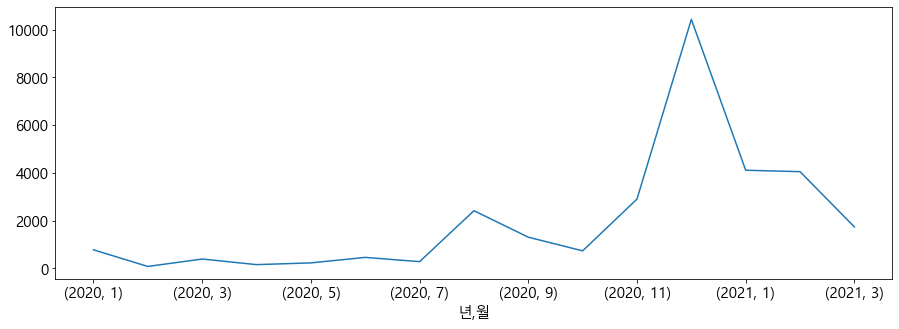

In [213]:
year_month_co.plot(kind='line', figsize=(15,5))
plt.show()

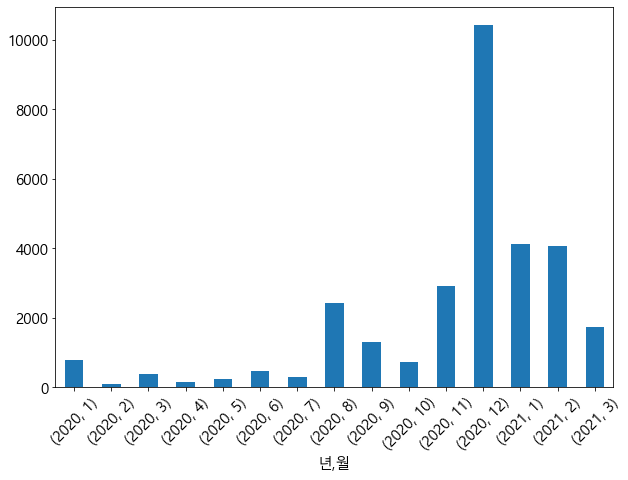

In [214]:
year_month_co.plot(kind='bar', figsize=(10,7),rot=45)
plt.show()

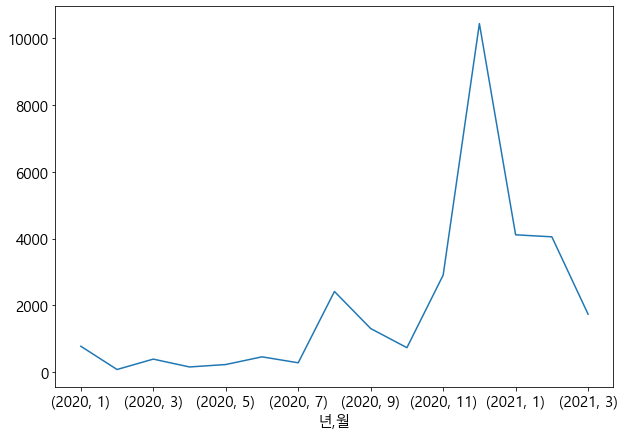

In [215]:
plt.figure(figsize=(10,7))
covid.groupby(['년','월'])['확진일'].count().plot(kind='line')
#plt.xticks(covid['월'].unique())
plt.show()

## 월-요일별 확진자수 조회 및 시각화

In [216]:
month_day_co_2020 = df[df['년']==2020].groupby(['월','요일'])['ID'].count()
month_day_co_2020

월   요일
1   4        3
    5      252
    6      191
    7      330
2   1        4
          ... 
12  3     1647
    4     2072
    5     1410
    6     1273
    7     1092
Name: ID, Length: 81, dtype: int64

In [217]:
month_day_co_2021 = df[df['년']==2021].groupby(['월','요일'])['ID'].count()
month_day_co_2021

월  요일
1  1     564
   2     684
   3     663
   4     536
   5     622
   6     563
   7     479
2  1     495
   2     767
   3     661
   4     592
   5     534
   6     537
   7     465
3  1     228
   2     257
   3     258
   4     269
   5     269
   6     244
   7     211
Name: ID, dtype: int64

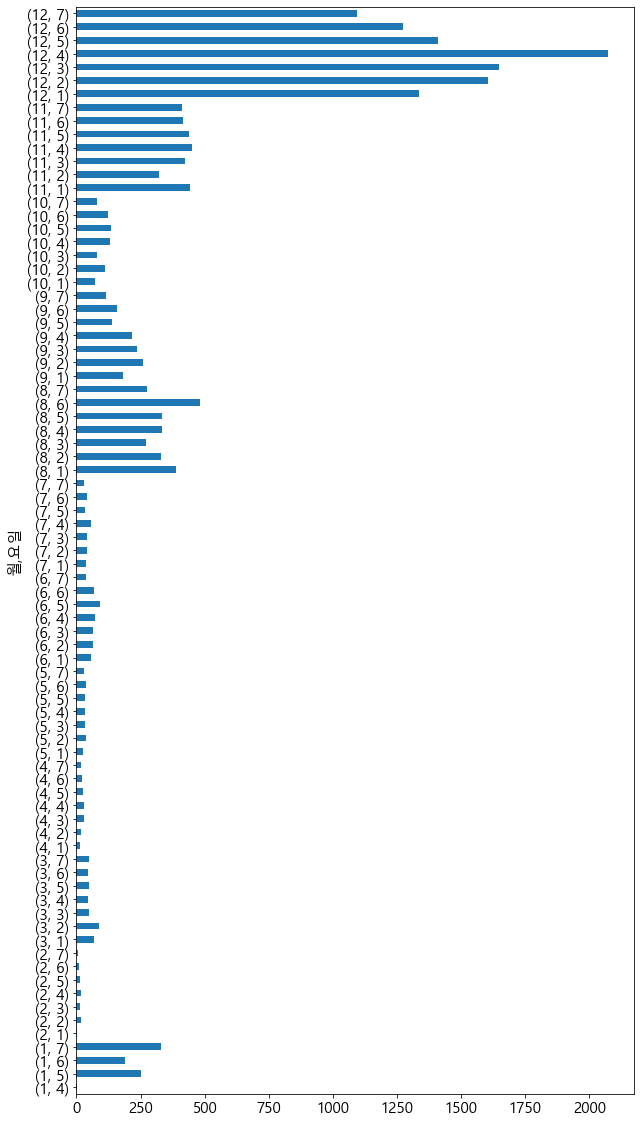

In [218]:
month_day_co_2020.plot(kind='barh',figsize=(10,20))

plt.show()

In [259]:
month_day_co2 = df[df['년']==2020].pivot_table(values='ID',
                                             index = '월',
                                             columns = '요일',
                                             aggfunc='count',
                                             fill_value=0)
month_day_co2

요일,월,화,수,목,금,토,일
월,,,,,,,
1,0,0,0,3,252,191,330
2,4,16,14,16,14,10,6
3,68,89,48,44,48,45,49
4,15,17,28,28,26,23,19
5,26,37,33,34,32,36,31
6,55,65,66,74,92,69,38
7,38,42,42,57,34,40,28
8,389,331,273,334,332,480,276
9,182,261,235,216,138,160,114


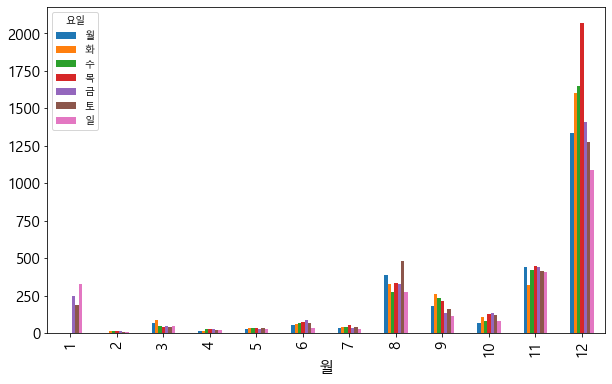

In [251]:
month_day_co2.plot(kind='bar',figsize=(10,6))
plt.show()

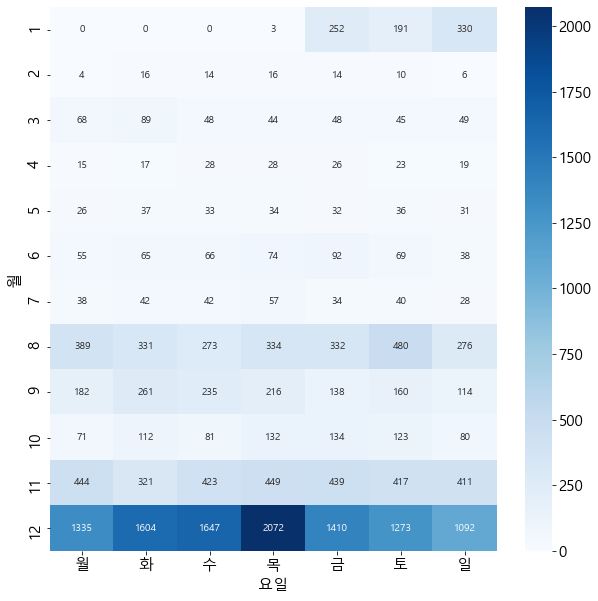

In [260]:
plt.figure(figsize=(10,10))
sns.heatmap(month_day_co2, cmap='Blues', annot=True, fmt='d')
plt.show()

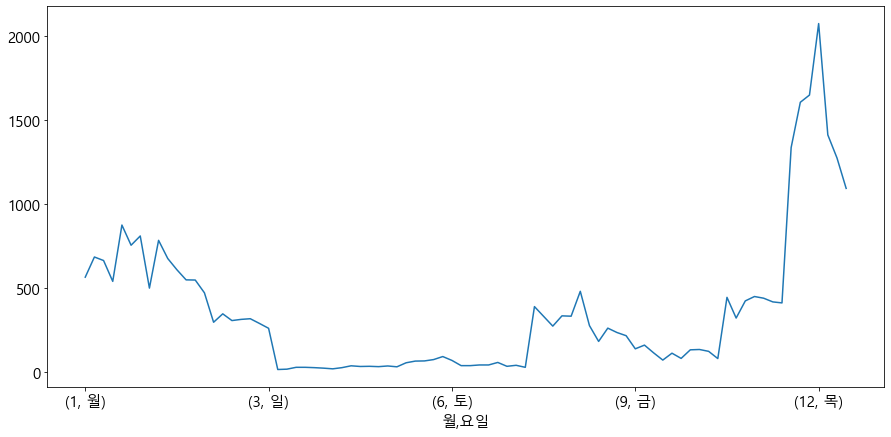

In [219]:
plt.figure(figsize=(15,7))
covid.groupby(['월','요일'])['확진일'].count().plot(kind='line')


plt.show()

# 누적 확진자수 조회 및 변화 흐름 시각화
- Series/DataFrame.cumsum()
    - 누적 합계
- Series.to_frame()
    - Series를 DataFrame으로 변환

## 일별 누적 확진자수 조회

In [261]:
a = pd.Series([1,2,3,4,5])
a.cumsum()

0     1
1     3
2     6
3    10
4    15
dtype: int64

In [268]:
# Series를 DateFrame으로 바꿀때.
a.to_frame()

,0
0,1
1,2
2,3
3,4
4,5


In [270]:
df['확진일'].value_counts().sort_index()

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-03-10    137
2021-03-11    140
2021-03-12    140
2021-03-13    112
2021-03-14    112
Name: 확진일, Length: 384, dtype: int64

In [273]:
cumsum_df = df['확진일'].value_counts().sort_index().cumsum().to_frame()
cumsum_df

,확진일
2020-01-24,1
2020-01-30,4
2020-01-31,7
2020-02-02,8
2020-02-05,10
...,...
2021-03-10,29557
2021-03-11,29697
2021-03-12,29837
2021-03-13,29949


In [274]:
cumsum_df.columns = ['누적확진자수']
cumsum_df

,누적확진자수
2020-01-24,1
2020-01-30,4
2020-01-31,7
2020-02-02,8
2020-02-05,10
...,...
2021-03-10,29557
2021-03-11,29697
2021-03-12,29837
2021-03-13,29949


In [ ]:
cum

In [263]:
df.groupby('확진일')['ID'].count().cumsum()

확진일
2020-01-24        1
2020-01-30        4
2020-01-31        7
2020-02-02        8
2020-02-05       10
              ...  
2021-03-10    29557
2021-03-11    29697
2021-03-12    29837
2021-03-13    29949
2021-03-14    30061
Name: ID, Length: 384, dtype: int64

In [262]:
covid.groupby('확진일')['요일'].count().cumsum()


확진일
2020-01-24        1
2020-01-30        4
2020-01-31        7
2020-02-02        8
2020-02-05       10
              ...  
2021-03-10    29557
2021-03-11    29697
2021-03-12    29837
2021-03-13    29949
2021-03-14    30061
Name: 요일, Length: 384, dtype: int64

## 확진자수 파생변수 생성

In [275]:
cumsum_df['확진자수'] = df['확진일'].value_counts().sort_index()
cumsum_df.head()

,누적확진자수,확진자수
2020-01-24,1,1
2020-01-30,4,3
2020-01-31,7,3
2020-02-02,8,1
2020-02-05,10,2


In [221]:
covid.tail()

,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일


In [222]:
covid.groupby('확진일').count().cumsum()

,자치구,여행력,접촉력,현재상태,년,월,주,요일
확진일,,,,,,,,
2020-01-24,1,1,1,1,1,1,1,1
2020-01-30,4,3,4,4,4,4,4,4
2020-01-31,7,3,7,7,7,7,7,7
2020-02-02,8,4,8,8,8,8,8,8
2020-02-05,10,5,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...
2021-03-10,29557,972,29557,27134,29557,29557,29557,29557
2021-03-11,29697,973,29697,27134,29697,29697,29697,29697
2021-03-12,29837,975,29837,27134,29837,29837,29837,29837


## 누적 확진자수 선그래프

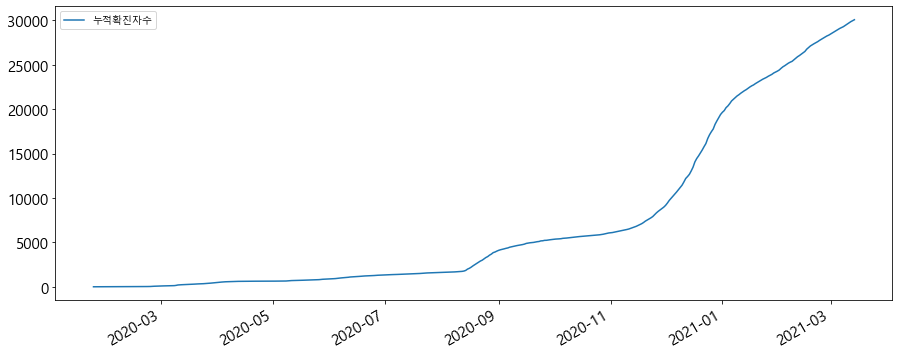

In [278]:
cumsum_df['누적확진자수'].plot(kind='line',figsize=(15,6))
plt.legend()
plt.show()

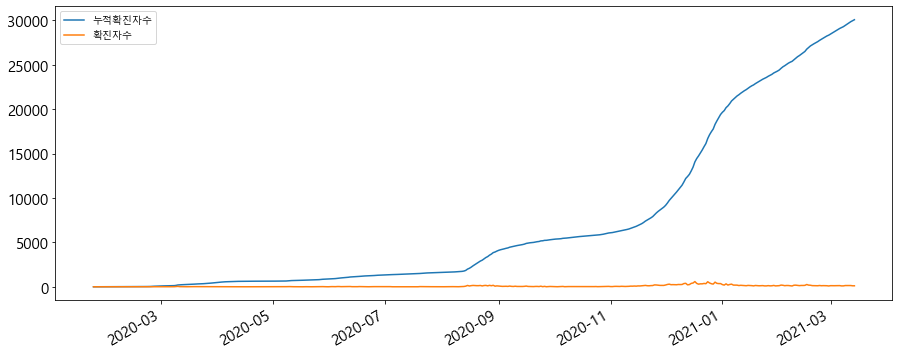

In [280]:
cumsum_df.plot(kind='line',figsize=(15,6))
plt.show()

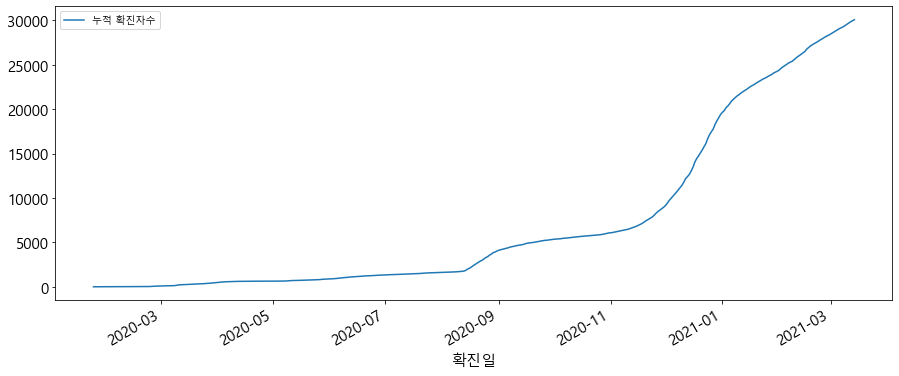

In [277]:
covid.groupby('확진일')['요일'].count().cumsum().plot(kind='line',figsize=(15,6))
plt.legend(labels=['누적 확진자수'])
plt.show()



# 자치구 기준 확진자 조회

In [224]:
covid['자치구'].count()

30061

## 자치구별 확진자수 조회

In [282]:
gu_co = df['자치구'].value_counts()
gu_co

기타      2000
강서구     1704
송파구     1658
타시도     1413
관악구     1408
강남구     1376
노원구     1322
성북구     1298
은평구     1262
중랑구     1250
동작구     1238
서초구     1148
양천구     1144
영등포구    1122
구로구     1094
동대문구    1087
강동구     1036
마포구      990
도봉구      954
광진구      876
용산구      815
서대문구     786
강북구      785
성동구      763
종로구      579
금천구      478
중구       475
Name: 자치구, dtype: int64

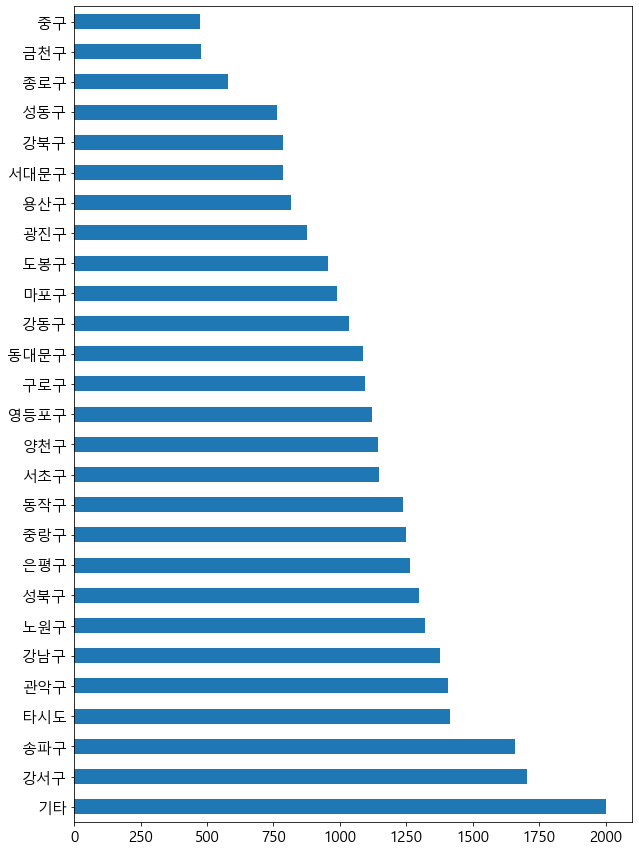

In [286]:
gu_co.plot(kind='barh', figsize=(10,15))
plt.show()

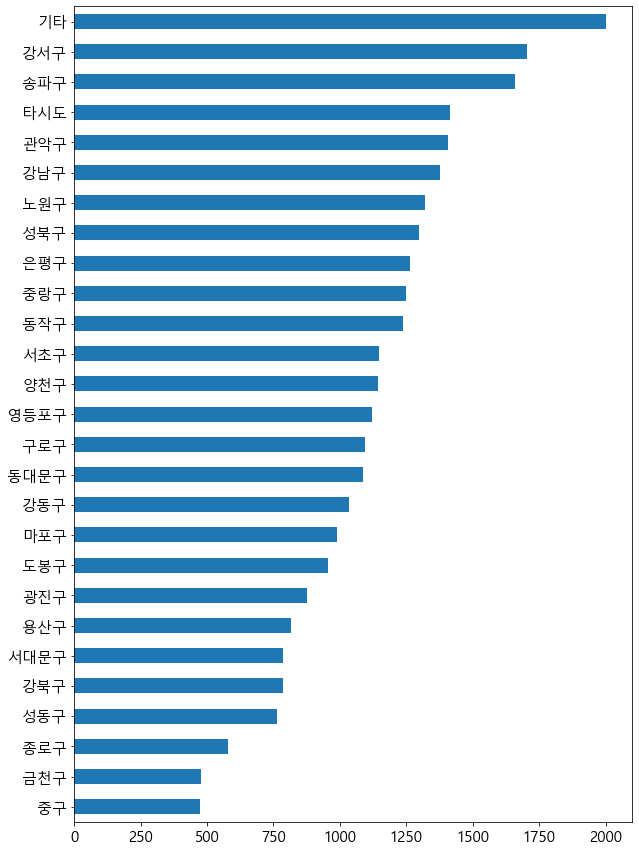

In [287]:
gu_co.sort_values().plot(kind='barh', figsize=(10,15))
plt.show()

In [225]:
covid.groupby('자치구').count()
covid.head()


,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
ID,,,,,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,4,금
2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목
3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금


In [226]:
gu_count = covid.sort_values('자치구').groupby('자치구').count()
gu_count['확진일']


자치구
강남구     1376
강동구     1036
강북구      785
강서구     1704
관악구     1408
광진구      876
구로구     1094
금천구      478
기타      2000
노원구     1322
도봉구      954
동대문구    1087
동작구     1238
마포구      990
서대문구     786
서초구     1148
성동구      763
성북구     1298
송파구     1658
양천구     1144
영등포구    1122
용산구      815
은평구     1262
종로구      579
중구       475
중랑구     1250
타시도     1413
Name: 확진일, dtype: int64

## 자치구별 확진자수 시각화

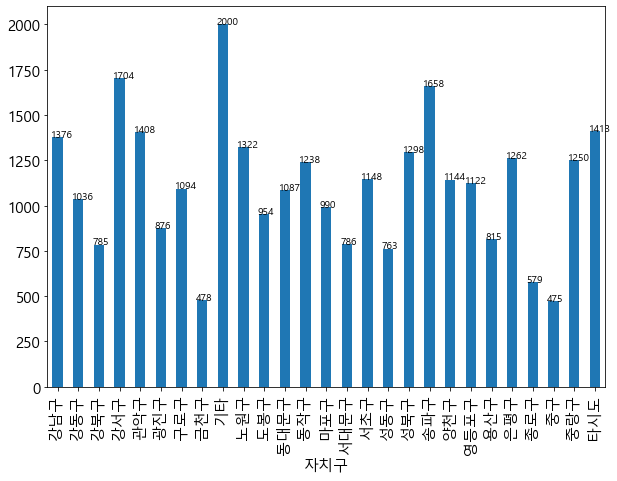

In [227]:
plt.figure(figsize=(10,7))
gu_count['확진일'].plot(kind='bar')
for idx, value in enumerate(gu_count['확진일']):
    plt.text(idx-0.3, value, value)
plt.show()




# 접촉력 관련 확진자 조회

In [288]:
df['접촉력'].nunique()

512

In [289]:
df['접촉력'].value_counts()

기타 확진자 접촉      9660
감염경로 조사중       6994
타시도 확진자 접촉     1304
동부구치소 관련       1175
해외유입            965
               ... 
삼성물산              1
안양 목회자 관련         1
중구 통일상가           1
부산시 방문주사 관련       1
서초구 LG 유플러스       1
Name: 접촉력, Length: 512, dtype: int64

In [228]:
contact = covid.groupby('접촉력').count()
contact

,확진일,자치구,여행력,현재상태,년,월,주,요일
접촉력,,,,,,,,
(인천계양구일가족관련) 연세나로학원,3,3,0,3,3,3,3,3
8.15서울도심집회,126,126,0,126,126,126,126,126
9월 송파구 지인모임,4,4,0,4,4,4,4,4
Ace 손해보험,98,98,0,98,98,98,98,98
EZHLD,6,6,0,6,6,6,6,6
...,...,...,...,...,...,...,...,...
플링크(IT기업),7,7,0,7,7,7,7,7
한양대병원,2,2,0,2,2,2,2,2
해외유입,965,965,958,879,965,965,965,965


## 가장 많은 집단 감염자를 낸 접촉력 상위 15개 조회

In [290]:
df['접촉력'].value_counts().head(15)

기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: 접촉력, dtype: int64

In [229]:
contact.sort_values('확진일', ascending=False)['확진일'].head(15)


접촉력
기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: 확진일, dtype: int64

## 가장 많은 집단 감염자를 낸 접촉력 하위 15 

In [291]:
df['접촉력'].value_counts().sort_values().head(15)

서초구 LG 유플러스         1
영등포 소재 의료기관 관련      1
남부교도소 관련            1
구로구소재 고등학교 관련       1
위에화엔터테인먼트           1
중구 소재 콜센터(다은컨설팅)    1
동대문구 소재 아동시설관련      1
신 천 지               1
관악구 김혜근의원           1
ㅋㅋ트랜드               1
아산병원                1
이에스에스콤글로벌           1
중랑구 서울의료원           1
부산시 방문주사 관련         1
광진구 소재 병원 관련        1
Name: 접촉력, dtype: int64

In [230]:
contact.sort_values('확진일', ascending=False)['확진일'].tail(15)


접촉력
영등포 소재 의료기관 관련      1
역조실 일보 반영           1
안양 목회자 관련           1
아산병원                1
신 천 지               1
서초구 LG 유플러스         1
광진구 소재 병원 관련        1
중구 소재 콜센터(다은컨설팅)    1
삼성물산                1
동대문구 소재 아동시설관련      1
이에스에스콤글로벌           1
중랑구 서울의료원           1
남부교도소 관련            1
구로구소재 고등학교 관련       1
부산시 방문주사 관련         1
Name: 확진일, dtype: int64

## 접촉력 상위 15개만 시각화

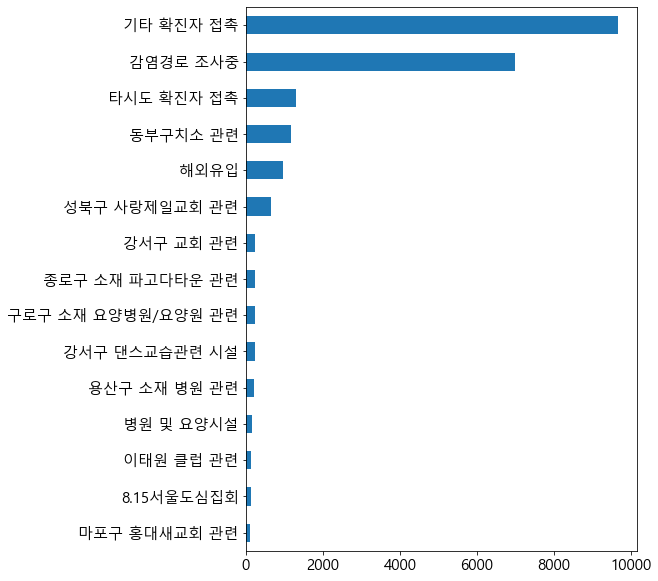

In [293]:
df['접촉력'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(7,10))
plt.show()

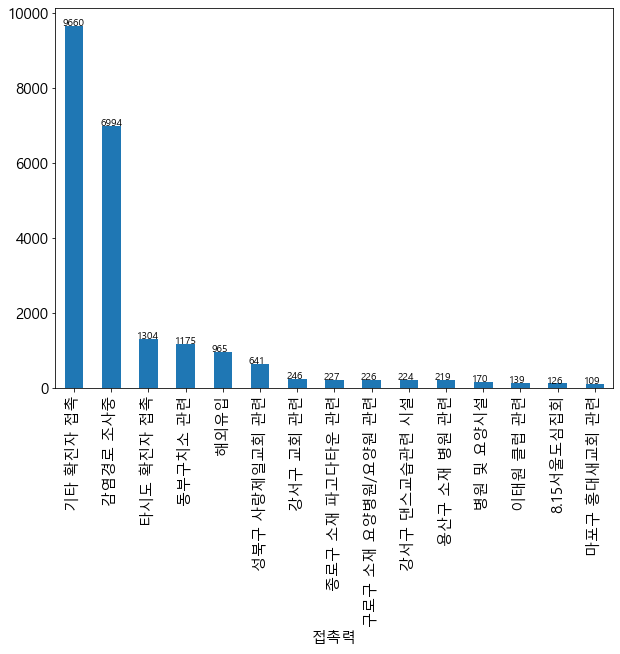

In [231]:
plt.figure(figsize=(10,7))
contact.sort_values('확진일', ascending=False)['확진일'].head(15).plot.bar()
for idx, value in enumerate(contact.sort_values('확진일', ascending=False)['확진일'].head(15)):
    plt.text(idx-0.3, value, value)
plt.show()

## 확진자를 가장 많이 발생시킨 접촉력 상위 15개를 기준으로  월별 빈도수를 집계
- 몇 월에 발생했는지 확인 (년도는 무시)

In [294]:
idx = df['접촉력'].value_counts().head(15).index
idx

Index(['기타 확진자 접촉', '감염경로 조사중', '타시도 확진자 접촉', '동부구치소 관련', '해외유입',
       '성북구 사랑제일교회 관련', '강서구 교회 관련', '종로구 소재 파고다타운 관련', '구로구 소재 요양병원/요양원 관련',
       '강서구 댄스교습관련 시설', '용산구 소재 병원 관련', '병원 및 요양시설', '이태원 클럽 관련', '8.15서울도심집회',
       '마포구 홍대새교회 관련'],
      dtype='object')

In [298]:
df.loc[df['접촉력'].isin(idx)].pivot_table(values='ID', 
                                        index='접촉력', 
                                        columns='월', 
                                        aggfunc='count', 
                                        fill_value=0)

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,1348,967,462,16,5,66,49,440,286,120,474,2761
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1964,1518,637,9,0,14,33,440,304,116,631,3994
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930
마포구 홍대새교회 관련,0,0,0,0,0,0,0,0,0,0,96,13
병원 및 요양시설,57,82,31,0,0,0,0,0,0,0,0,0


In [299]:
covid.pivot_table(values='확진일', 
                  index='접촉력',
                  columns='월',
                  aggfunc='count',
                  fill_value=0, 
                  margins=True,
                  margins_name='total sum').sort_values('total sum', ascending=False).head(15)

월,1,2,3,4,5,6,7,8,9,10,11,12,total sum
접촉력,,,,,,,,,,,,,
total sum,4887,4131,2127,156,229,459,281,2415,1306,733,2904,10433,30061
기타 확진자 접촉,1964,1518,637,9,0,14,33,440,304,116,631,3994,9660
감염경로 조사중,1348,967,462,16,5,66,49,440,286,120,474,2761,6994
타시도 확진자 접촉,212,163,115,1,2,4,13,102,71,33,124,464,1304
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930,1175
해외유입,152,141,164,111,25,23,39,50,23,44,83,110,965
성북구 사랑제일교회 관련,0,0,0,0,0,0,0,628,13,0,0,0,641
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245,246
종로구 소재 파고다타운 관련,0,0,0,0,0,0,0,0,0,0,1,226,227


In [232]:
covid.pivot_table(values='확진일', index='접촉력',columns='월',aggfunc='count',fill_value=0, margins=True,
                    margins_name='total sum').sort_values('total sum', ascending=False).drop('total sum').head(15)

월,1,2,3,4,5,6,7,8,9,10,11,12,total sum
접촉력,,,,,,,,,,,,,
기타 확진자 접촉,1964,1518,637,9,0,14,33,440,304,116,631,3994,9660
감염경로 조사중,1348,967,462,16,5,66,49,440,286,120,474,2761,6994
타시도 확진자 접촉,212,163,115,1,2,4,13,102,71,33,124,464,1304
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,3,930,1175
해외유입,152,141,164,111,25,23,39,50,23,44,83,110,965
성북구 사랑제일교회 관련,0,0,0,0,0,0,0,628,13,0,0,0,641
강서구 교회 관련,1,0,0,0,0,0,0,0,0,0,0,245,246
종로구 소재 파고다타운 관련,0,0,0,0,0,0,0,0,0,0,1,226,227
구로구 소재 요양병원/요양원 관련,27,0,0,0,0,0,0,0,0,0,0,199,226


# 현재상태 관련조회

## 사망자 수/비율 조회

In [300]:
(df['현재상태']=='사망').sum()

405

In [304]:
(df['현재상태']=='사망').mean()

0.013472605701739795

In [301]:
df['현재상태'].value_counts()

퇴원    26738
사망      405
Name: 현재상태, dtype: int64

In [ ]:
df['현재상태'].value_counts()['사망']

In [305]:
df['현재상태'].value_counts()['퇴원']

26738

In [306]:
(df['현재상태']=='퇴원').sum()

26738

In [307]:
(df['현재상태']=='퇴원').mean()

0.8894581018595522

In [ ]:
aaaaa

In [233]:
covid.pivot_table(values='확진일',index='자치구',columns='현재상태',aggfunc='count')

현재상태,사망,퇴원
자치구,,
강남구,16,1232
강동구,17,885
강북구,12,714
강서구,17,1599
관악구,17,1313
광진구,12,713
구로구,9,986
금천구,8,429
기타,40,1586


In [235]:
c=covid.groupby('현재상태')[['확진일']].count()
c


,확진일
현재상태,
사망,405
퇴원,26738


In [234]:
na = covid['현재상태'].isna().sum()



In [236]:
c.loc['치료중'] = [na]
c

,확진일
현재상태,
사망,405
퇴원,26738
치료중,2918


In [303]:
death_ratio = c.loc['사망']/covid['확진일'].count()*100
print(f'사망자 수/비율 {death_ratio}')

사망자 수/비율 확진일    1.347261
Name: 사망, dtype: float64


## 퇴원, 사망자, 치료중(NA)의 비율을 시각화

In [308]:
df['현재상태'].value_counts(dropna=False)

퇴원     26738
NaN     2918
사망       405
Name: 현재상태, dtype: int64

<AxesSubplot:ylabel='현재상태'>

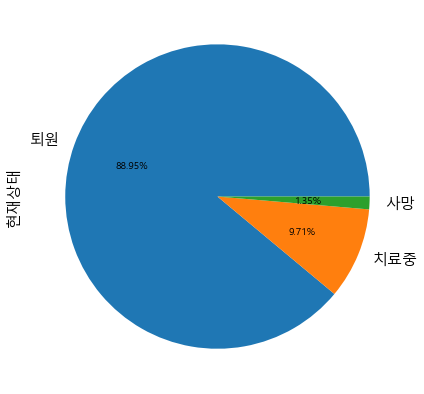

In [314]:
df['현재상태'].fillna('치료중').value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(7,7))

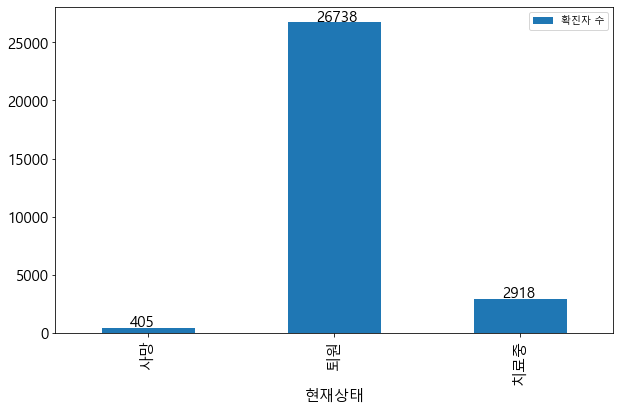

In [320]:
c.plot(kind='bar',figsize=(10,6))
for idx, value in enumerate(c['확진일']):
    plt.text(idx-0.1,value+100, value, fontsize=15)
plt.legend(labels=['확진자 수'])
plt.show()